# Data loading auxiliary functions

In [1]:
%matplotlib inline
import pdb
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from db import d_models, make_session
from plot import set_font_size

import CONFIG as C
import LOCAL_SETTINGS as L

### Auxiliary function `"avg_or_interp(t, x, w, cols_ang)"`

Test case 1: multi-column array requiring averaging, interpolating, and ignoring in four different columns.

Column 1 admits averaging. Column 2 requires interpolating. Column 3, 4, and 5 require ignoring.

In [2]:
from data import avg_or_interp

t = np.array([0., 1, 2, 3, 4])
x = np.array([
    [.5,    0.1, np.nan,    0.1, np.nan],
    [.6, np.nan, np.nan, np.nan, np.nan],
    [.8, np.nan, np.nan, np.nan, np.nan],
    [.9, np.nan,    0.2, np.nan, np.nan],
    [1.,    0.5,    0.8, np.nan, np.nan],
])
w = (0.5, 2.5)

y_correct = np.array([0.7, 0.25, np.nan, np.nan, np.nan])

y = avg_or_interp(t, x, w, cols_ang=None)

np.testing.assert_array_almost_equal(y, y_correct)

print('TEST PASSED.')

TEST PASSED.


Test case 2: same as test case 1 but testing columns individually

In [3]:
for x_, y_correct_ in zip(x.T, y_correct):
    
    y = avg_or_interp(t, x_, w, cols_ang=None)
    np.testing.assert_array_almost_equal([y], [y_correct_])
    
print('TEST PASSED')

TEST PASSED


Test case 3: test including angular variables that require wrapping and unwrapping.

In [4]:
t = np.array([0., 1, 2, 3, 4])
x = np.array([
    [ 170,    170,    170, np.nan,    0.1, np.nan],
    [ 175, np.nan, np.nan, np.nan, np.nan, np.nan],
    [-165, np.nan, np.nan, np.nan, np.nan, np.nan],
    [-150, np.nan, np.nan,    0.2, np.nan, np.nan],
    [-160,   -150,   -150,    0.8, np.nan, np.nan],
])
w = (0.5, 2.5)

y_correct = np.array([-175, -175, 50, np.nan, np.nan, np.nan])

y = avg_or_interp(t, x, w, cols_ang=[0, 1])

np.testing.assert_array_almost_equal(y, y_correct)

print('TEST PASSED.')

TEST PASSED.


### Auxiliary functions `"wrap(x, x_min, x_max)"` and `"unwrap(x, x_min, x_max)"`

How to interpret: if original (top) and unwrapped (bottom) are identical, and wrapped (middle) is constrained between -180 and 180, then test is passed.

TEST PASSED


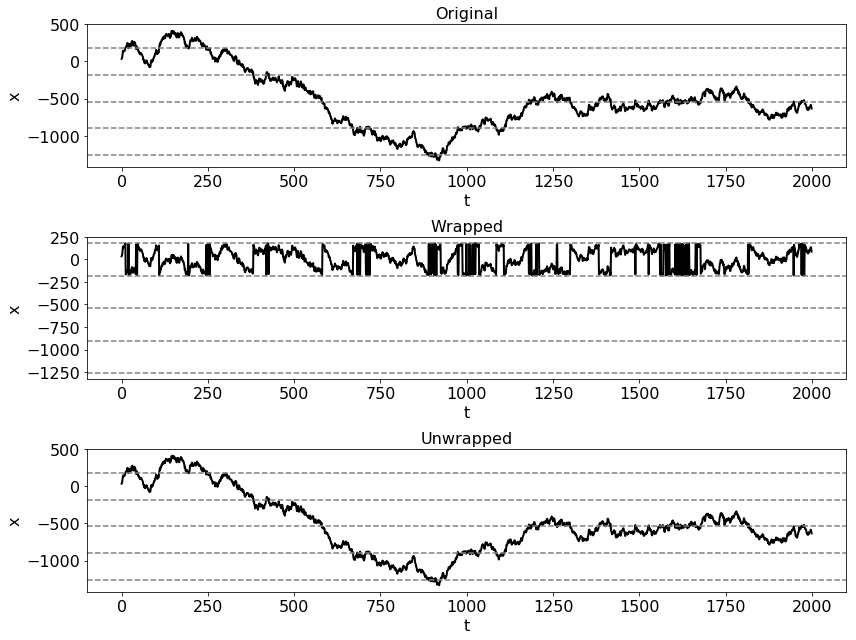

In [5]:
from data import wrap, unwrap

np.random.seed(0)

x = np.cumsum(np.random.normal(0, 20, 2000))
x_wrapped = wrap(x, -180, 180)
x_unwrapped = unwrap(x_wrapped, -180, 180)

fig, axs = plt.subplots(3, 1, figsize=(12, 9), tight_layout=True)

axs[0].plot(x, color='k', lw=2)
axs[0].set_title('Original')

axs[1].plot(x_wrapped, color='k', lw=2)
axs[1].set_title('Wrapped')

axs[2].plot(x_unwrapped, color='k', lw=2)
axs[2].set_title('Unwrapped')

for ax in axs:
    ax.axhline(-1260, color='gray', ls='--')
    ax.axhline(-900, color='gray', ls='--')
    ax.axhline(-540, color='gray', ls='--')
    ax.axhline(-180, color='gray', ls='--')
    ax.axhline(180, color='gray', ls='--')
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    set_font_size(ax, 16)
    
np.testing.assert_array_almost_equal(x, x_unwrapped)
print('TEST PASSED')

# Top-level data loading functions

In [6]:
EXPL_CL = '20170428.Fly2.1'
EXPL_DR = '20170428.Fly2.4'
EXPL_NA = '20170428.Fly5.3'

### GCaMP traces

If each pair of traces overlays visually the test is passed.

Loading clean data from file "clean_0.csv"...


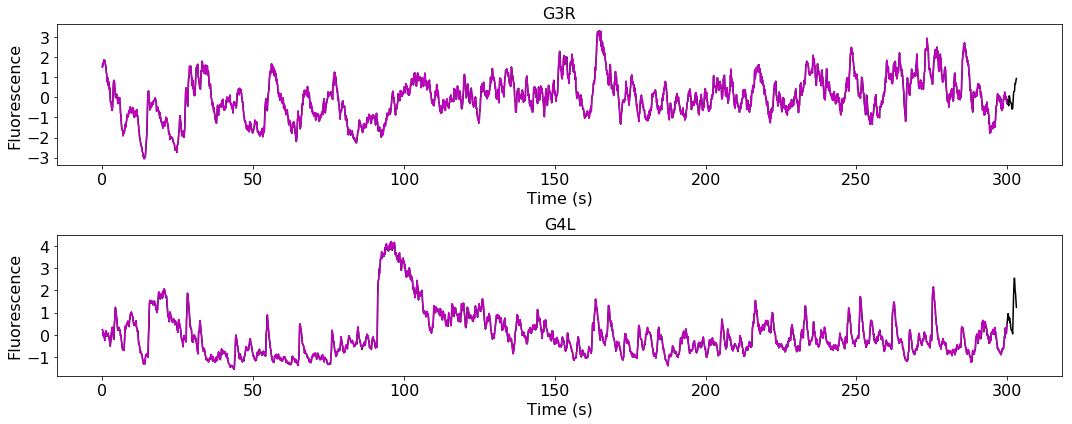

In [7]:
from data import DataLoader, get_trial, norm_by_col
from data import load_gcamp

trial = get_trial(EXPL_CL)

fig, axs = plt.subplots(2, 1, figsize=(15, 6), tight_layout=True)

# plot raw data
t_gcamp, gcamp = load_gcamp(trial)

g3r_raw = norm_by_col(gcamp[:, 9] / gcamp[:, 1])
g4l_raw = norm_by_col(gcamp[:, 14] / gcamp[:, 6])

axs[0].plot(t_gcamp, g3r_raw, color='k')
axs[1].plot(t_gcamp, g4l_raw, color='k')

# plot cleaned data
dl = DataLoader(trial, sfx='0', vel_filt=None)

axs[0].plot(dl.t, dl.g3r, color='m')
axs[1].plot(dl.t, dl.g4l, color='m')

axs[0].set_title('G3R')
axs[1].set_title('G4L')

for ax in axs:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Fluorescence')
    set_font_size(ax, 16)

### Behav traces

Loading clean data from file "clean_0.csv"...


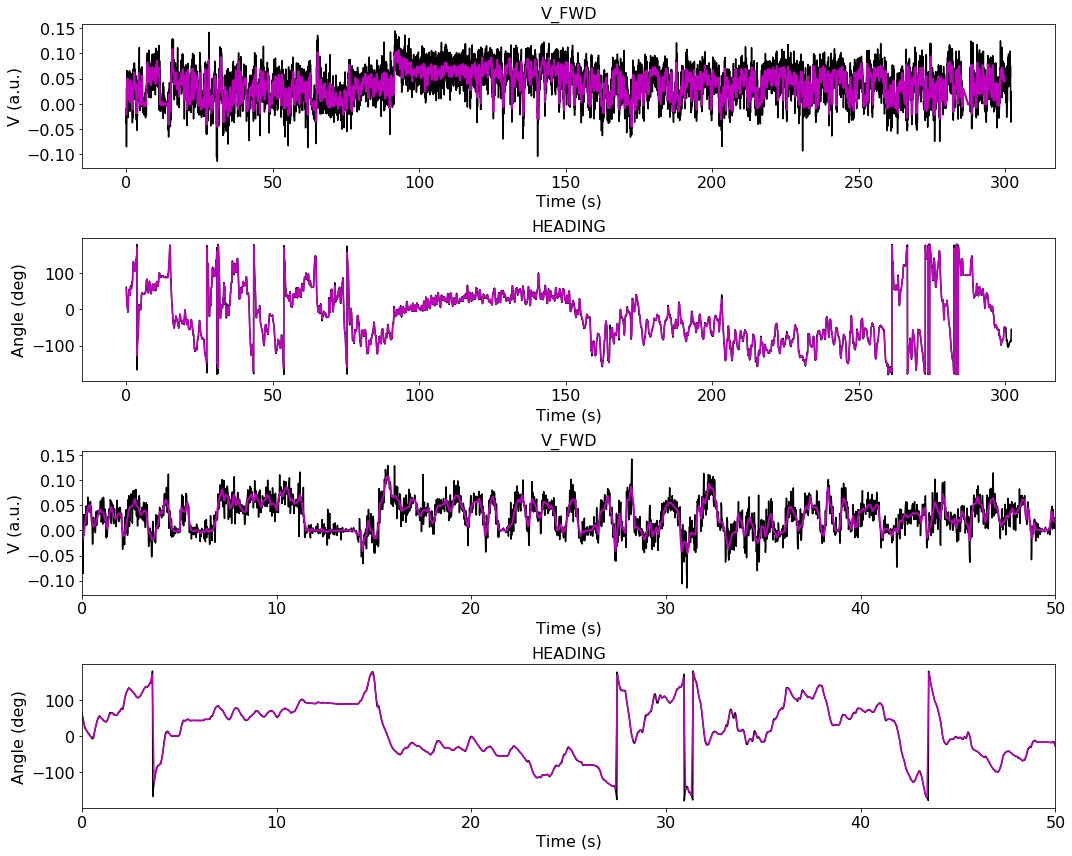

In [8]:
from data import load_behav

trial = get_trial(EXPL_CL)

fig, axs = plt.subplots(4, 1, figsize=(15, 12), tight_layout=True)

# plot raw data
t_behav_cl, behav_cl = load_behav(trial)

axs[0].plot(t_behav_cl, behav_cl[:, 1], color='k')
axs[2].plot(t_behav_cl, behav_cl[:, 1], color='k')
axs[1].plot(t_behav_cl, behav_cl[:, 3], color='k')
axs[3].plot(t_behav_cl, behav_cl[:, 3], color='k')

# plot cleaned data
dl = DataLoader(trial, sfx='0', vel_filt=None)

axs[0].plot(dl.t, dl.v_fwd, color='m', lw=2)
axs[2].plot(dl.t, dl.v_fwd, color='m', lw=2)
axs[1].plot(dl.t, dl.heading, color='m')
axs[3].plot(dl.t, dl.heading, color='m')

axs[0].set_ylabel('V (a.u.)')
axs[0].set_title('V_FWD')
axs[2].set_ylabel('V (a.u.)')
axs[2].set_title('V_FWD')

axs[1].set_ylabel('Angle (deg)')
axs[1].set_title('HEADING')
axs[3].set_ylabel('Angle (deg)')
axs[3].set_title('HEADING')

for ax in axs[2:]:
    ax.set_xlim(0, 50)
    
for ax in axs:
    ax.set_xlabel('Time (s)')
    set_font_size(ax, 16)

### Air tube traces

Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...


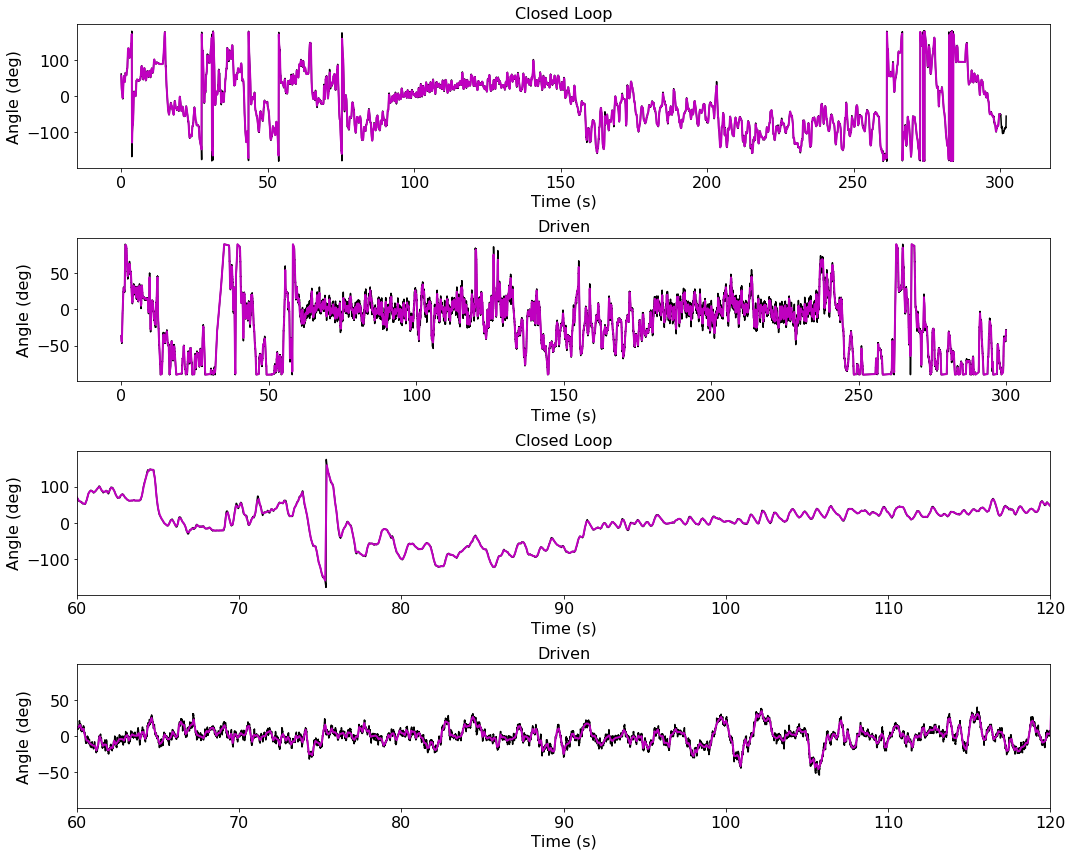

In [9]:
from data import load_air

trial_cl = get_trial(EXPL_CL)
trial_dr = get_trial(EXPL_DR)
trial_na = get_trial(EXPL_NA)

fig, axs = plt.subplots(4, 1, figsize=(15, 12), tight_layout=True)

# plot raw data
t_air_cl, air_cl = load_air(trial_cl, t_behav_cl, behav_cl)
t_air_dr, air_dr = load_air(trial_dr)
t_air_na, air_na = load_air(trial_na, t_behav_cl)

axs[0].plot(t_air_cl, air_cl[:, 0], color='k')
axs[2].plot(t_air_cl, air_cl[:, 0], color='k')
axs[1].plot(t_air_dr, air_dr[:, 0], color='k')
axs[3].plot(t_air_dr, air_dr[:, 0], color='k')

# plot cleaned data
dl_cl = DataLoader(trial_cl, sfx='0', vel_filt=None)
dl_dr = DataLoader(trial_dr, sfx='0', vel_filt=None)
dl_na = DataLoader(trial_na, sfx='0', vel_filt=None)

axs[0].plot(dl_cl.t, dl_cl.air, color='m', lw=2)
axs[2].plot(dl_cl.t, dl_cl.air, color='m', lw=2)
axs[1].plot(dl_dr.t, dl_dr.air, color='m', lw=2)
axs[3].plot(dl_dr.t, dl_dr.air, color='m', lw=2)

axs[0].set_title('Closed Loop')
axs[1].set_title('Driven')
axs[2].set_title('Closed Loop')
axs[3].set_title('Driven')

for ax in axs[2:]:
    ax.set_xlim(60, 120)

for ax in axs:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Angle (deg)')
    set_font_size(ax, 16)
    
assert all(np.isnan(air_na[:, 0]))
assert all(np.isnan(dl_na.air))

Now test that air tube sign is consistent (i.e., its derivative is opposite the fly's angular velocity in the closed loop trials.

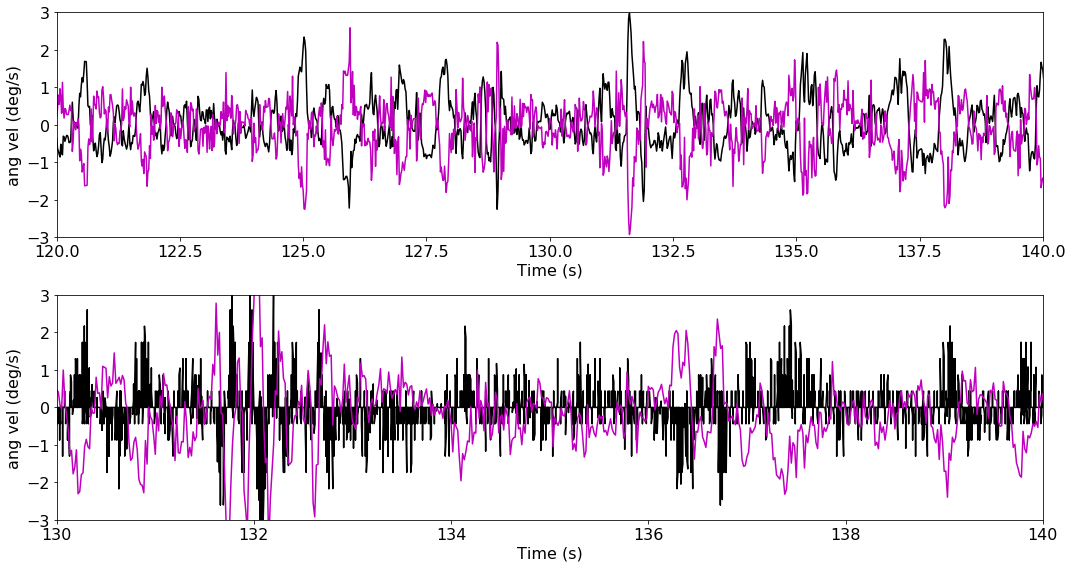

In [10]:
from data import unwrap

fig, axs = plt.subplots(2, 1, figsize=(15, 8), tight_layout=True)

t_behav_dr, behav_dr = load_behav(trial_dr)

# take derivatives of air tube velocity

axs[0].plot(t_air_cl, norm_by_col(air_cl[:, 1]), color='k')
axs[0].plot(t_behav_cl, norm_by_col(behav_cl[:, 2]), color='m')

axs[0].set_xlim(120, 140)
axs[0].set_ylim(-3, 3)

axs[1].plot(t_air_dr, norm_by_col(np.gradient(air_dr[:, 0])), color='k')
axs[1].plot(t_behav_dr, norm_by_col(behav_dr[:, 2]), color='m')

axs[1].set_xlim(130, 140)
axs[1].set_ylim(-3, 3)

for ax in axs:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('ang vel (deg/s)')
    set_font_size(ax, 16)

Ensure air tube velocity is opposite to fly's angular velocity in closed loop portions of driven random trials.

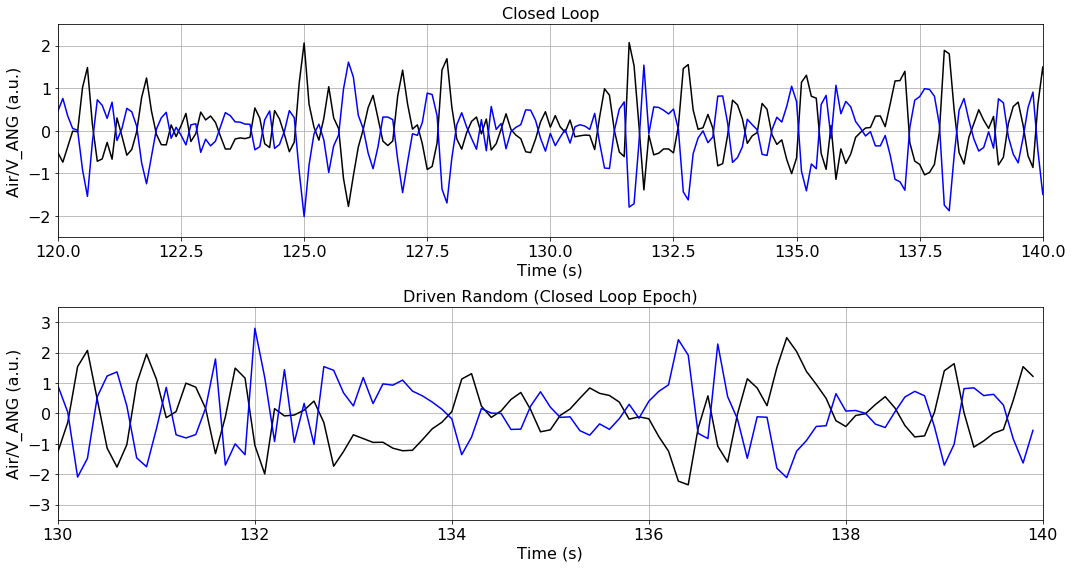

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(15, 8), tight_layout=True)

axs[0].plot(dl_cl.t, norm_by_col(dl_cl.v_air), color='k')
axs[0].plot(dl_cl.t, norm_by_col(dl_cl.v_ang), color='b')

axs[0].set_xlim(120, 140)
axs[0].set_ylim(-2.5, 2.5)

axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Air/V_ANG (a.u.)')

axs[0].set_title('Closed Loop')

mask_dr = (130 <= dl_dr.t) & (dl_dr.t < 140)
axs[1].plot(dl_dr.t[mask_dr], norm_by_col(dl_dr.v_air[mask_dr]), color='k')
axs[1].plot(dl_dr.t[mask_dr], norm_by_col(dl_dr.v_ang[mask_dr]), color='b')

axs[1].set_xlim(130, 140)
axs[1].set_ylim(-3.5, 3.5)

axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Air/V_ANG (a.u.)')

axs[1].set_title('Driven Random (Closed Loop Epoch)')

for ax in axs:
    ax.grid()
    set_font_size(ax, 16)